In [9]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


Load and Preprocess MNIST Dataset

In [5]:
# Load data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Training samples: {x_train.shape}, Test samples: {x_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step
Training samples: (60000, 28, 28, 1), Test samples: (10000, 28, 28, 1)


Build CNN Model

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (0–9)
])


 Compile and Train Model

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9077 - loss: 0.3162 - val_accuracy: 0.9854 - val_loss: 0.0476
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9854 - loss: 0.0463 - val_accuracy: 0.9866 - val_loss: 0.0408
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9892 - val_loss: 0.0361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9927 - loss: 0.0221 - val_accuracy: 0.9888 - val_loss: 0.0364
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9953 - loss: 0.0153 - val_accuracy: 0.9905 - val_loss: 0.0314


Confusion Matrix and Classification Report

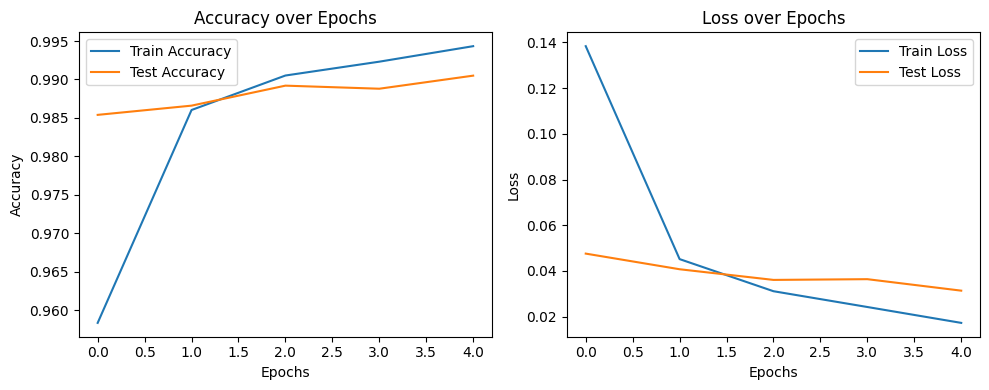

In [12]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Confusion Matrix and Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


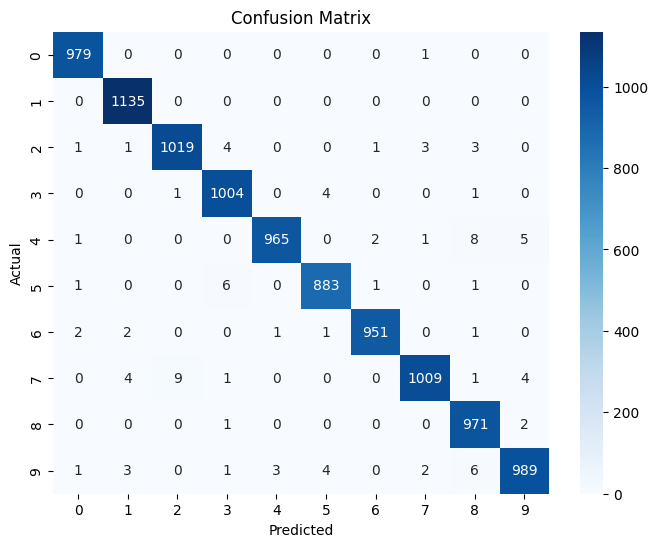

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [13]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_classes))


Visualize Model Predictions

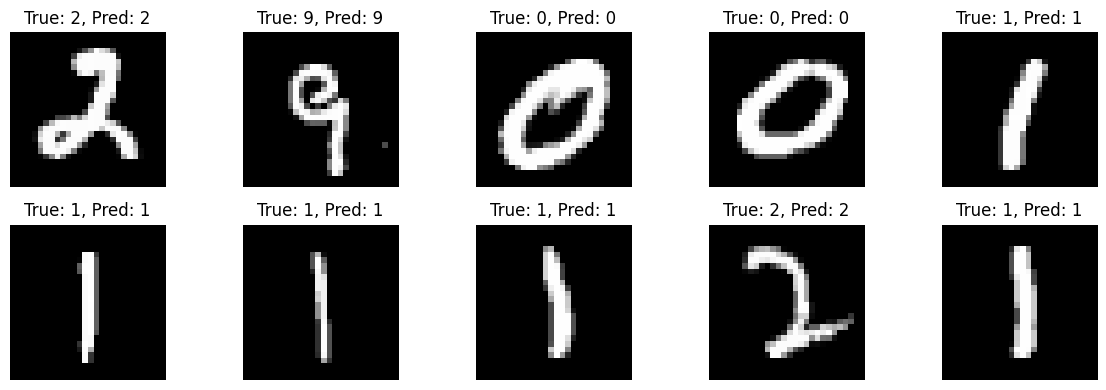

In [14]:
# Display 10 random predictions
plt.figure(figsize=(12,4))
for i in range(10):
    idx = np.random.randint(0, len(x_test))
    img = x_test[idx].reshape(28,28)
    true_label = y_test[idx]
    pred_label = y_pred_classes[idx]

    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [17]:
import pickle

# Save model architecture and weights
model_structure = model.to_json()
model_weights = model.get_weights()

with open('mnist_cnn_model.pkl', 'wb') as f:
    pickle.dump((model_structure, model_weights), f)
